In [1]:
from representations.representation_factory import create_representation


In [4]:
embedding_path = "/home/joaopcbertoldo/repos/jokar/rsrc/coha-lemma/sgns/1990"
emb = create_representation("sgns", embedding_path)

Loading Embedding from /home/joaopcbertoldo/repos/jokar/rsrc/coha-lemma/sgns/1990 normalize=False
Loading pickle file /home/joaopcbertoldo/repos/jokar/rsrc/coha-lemma/sgns/1990-vocab.pkl


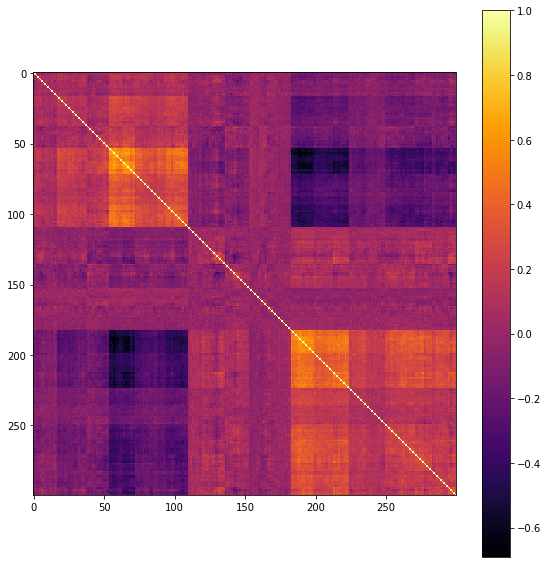

In [10]:
from scipy import stats
from scipy.cluster import hierarchy

spearman = stats.spearmanr(emb.m)
spearman_corr = spearman.correlation

corr_linkage = hierarchy.ward(spearman_corr)

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 8))
ax2 = fig.gca()

dendro = hierarchy.dendrogram(corr_linkage, no_plot=True)
dendro_idx = np.arange(0, len(dendro['ivl']))

im = ax2.imshow(spearman_corr[dendro['leaves'], :][:, dendro['leaves']], cmap='inferno')

plt.colorbar(im, ax=ax2)
fig.tight_layout()
plt.show()

In [6]:
print(f"norm(corr - I): {np.mean(np.abs((spearman_corr - np.eye(emb.dim)).ravel()))}")

norm(corr - I): 0.1471572295271761


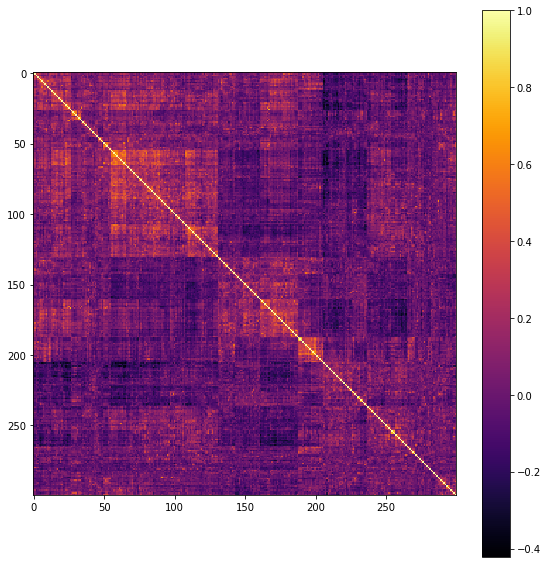

In [7]:
from scipy import stats
from scipy.cluster import hierarchy
import itertools

pearson_corr = np.zeros((emb.dim, emb.dim))
for i, j in itertools.product(range(emb.dim), range(emb.dim)):
    if i <= j:
        pearson_ij = stats.pearsonr(emb.m[i], emb.m[j])[0]
    else:
        pearson_ij = pearson_corr[j, i]
    pearson_corr[i, j] = pearson_ij

corr_linkage = hierarchy.ward(pearson_corr)

fig = plt.figure(figsize=(8, 8))
ax2 = fig.gca()

dendro = hierarchy.dendrogram(corr_linkage, no_plot=True)
dendro_idx = np.arange(0, len(dendro['ivl']))

im = ax2.imshow(pearson_corr[dendro['leaves'], :][:, dendro['leaves']], cmap='inferno')

plt.colorbar(im, ax=ax2)
fig.tight_layout()
plt.show()

In [8]:
print(f"norm(corr - I): {np.mean(np.abs((pearson_corr - np.eye(emb.dim)).ravel()))}")

norm(corr - I): 0.10032212545965065


In [28]:
import scipy as sp

word1 = "king"
word1_emb = emb.m[emb.wi[word1]]

word2 = "queen"
word2_emb = emb.m[emb.wi[word2]]

print(f"Similarity {emb.similarity(word1, word2)}")
print(f"inner prod {word1_emb.dot(word2_emb)}")
print(f"scipy  {1- sp.spatial.distance.cosine(word1_emb, word2_emb)}")

Similarity 0.555628229847315
inner prod 0.555628229847315
scipy  0.5556282298473149


In [25]:
def softcos(v1, v2, similarity_matrix):
    dim = len(similarity_matrix)
    a, b, ab = 0., 0., 0.
    for i, j in itertools.product(range(dim), range(dim)):
        ab += similarity_matrix[i, j] * v1[i] * v2[j]
        a += similarity_matrix[i, j] * v1[i] * v1[j]
        b += similarity_matrix[i, j] * v2[i] * v2[j]
    return ab / np.sqrt(a) / np.sqrt(b)

In [26]:
print(f"soft cos pearson {softcos(word1_emb, word2_emb, pearson_corr)}")
print(f"soft cos spearman {softcos(word1_emb, word2_emb, spearman_corr)}")

soft cos pearson 0.570531309907307
soft cos spearman 0.777379430655018
